In [1]:
! pip install -U gensim==3.8.3

In [27]:
! pip install pandas 
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [3]:
! pip install --upgrade deepl
import deepl

In [5]:
auth_key='3ac624d4-1954-a27d-e7d5-6cd525e297de'
translator = deepl.Translator(auth_key)

result = translator.translate_text("Bonjour le Monde!", target_lang="EN-GB")
print(result.text)  # "Bonjour, le monde !"

Hello World!


In [185]:
data_cleaned2 = pd.read_csv("data_cleaned2.csv")

In [186]:
data_cleaned2.shape

(1358, 54)

In [187]:
resumen_alcance = data_cleaned2[['Resumen proyecto', 'Alcance','Horas']]


In [188]:
#Do not run this! or I'll pay 
#auth_key='3ac624d4-1954-a27d-e7d5-6cd525e297de'
#translator = deepl.Translator(auth_key)
# Translating into english   
#for idx, text in resumen_alcance['Resumen proyecto'].items():
        #resumen_alcance.loc[idx, 'Resumen proyecto'] = translator.translate_text(text, target_lang="EN-GB").text

In [191]:
#resumen_alcance.shape

(1358, 3)

In [190]:
resumen_alcance.to_csv('deepldataset2.csv')

In [192]:
! pip install nltk
import nltk
# Import packages and modules
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
! pip install -U scikit-learn
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import string
from nltk.stem import *
nltk.download("punkt") # For Stemming
nltk.download("wordnet") # For Lemmatization
nltk.download("stopwords") # For Stopword Removal
nltk.download("omw-1.4")


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nathanielthomascopeland/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nathanielthomascopeland/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nathanielthomascopeland/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/nathanielthomascopeland/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [193]:
# Import module
from nltk.tokenize import RegexpTokenizer
# Create an instance of RegexpTokenizer for alphanumeric tokens
preprocessed=[]
tokeniser = RegexpTokenizer(r'\w+')
lemmatiser = WordNetLemmatizer()
for resumen in resumen_alcance['Resumen proyecto']:
    try:
        tokens=tokeniser.tokenize(resumen)
        lemmas = [lemmatiser.lemmatize(word.lower(), pos='v') for word in tokens]
        key_words = [word for word in lemmas if word not in stopwords.words('english') and len(word) > 2]
        preprocessed.append(key_words)
    except:
        preprocessed.append(None)
    



In [194]:
len(preprocessed)


1358

In [195]:
#Model: Bag of words 
from sklearn.preprocessing import MultiLabelBinarizer

count_vec = MultiLabelBinarizer()
mlb = count_vec.fit(preprocessed)
result = pd.DataFrame(mlb.transform(preprocessed), columns=[mlb.classes_])


In [197]:
result.shape

(1358, 7263)

In [365]:
result.to_csv('preprocessedbadofwordsresumen2.csv')

In [504]:
df=pd.read_csv('preprocessedbadofwordsresumen2.csv')


In [505]:
df=df.drop(['Unnamed: 0'], axis=1)

In [442]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1358 entries, 0 to 1357
Columns: 7263 entries, 000 to único
dtypes: int64(7263)
memory usage: 75.3 MB


In [443]:
# Calculate the totals of each individual column and store them in a new DataFrame
totals = pd.DataFrame(df.sum(), columns=['Total'])

# Add the column names as a new column in the DataFrame
totals['Column Name'] = totals.index

# Sort the DataFrame in descending order of the total column
totals = totals.sort_values(by=['Total'], ascending=False)

# Print the top 10 rows of the sorted DataFrame
print(totals.head(100))

                Total     Column Name
project           557         project
new               542             new
process           463         process
information       460     information
make              370            make
request           362         request
currently         342       currently
order             340           order
report            336          report
bank              334            bank
necessary         331       necessary
include           326         include
carry             314           carry
follow            313          follow
risk              300            risk
management        296      management
data              279            data
use               274             use
aim               272             aim
current           267         current
require           258         require
application       253     application
customer          252        customer
need              251            need
account           246         account
change      

In [444]:
df['horas']=data_cleaned['Horas']

In [445]:
bins = [0, 300, 800, 2000, 47000]  
labels = ['0-300', '301-800','801-2000','+2000']  
target_categories = pd.cut(df['horas'], bins=bins, labels=labels)


df['Horas Categories'] = target_categories
df = df.drop(columns = ["horas"])
df['Horas Categories'].value_counts()


301-800     386
801-2000    354
0-300       335
+2000       282
Name: Horas Categories, dtype: int64

In [506]:
df['date']=data_cleaned['Fecha inicio']

In [507]:
df['date']= pd.to_datetime(df['date'])

In [508]:
df.isna().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      0
81      0
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      0
90      0
91      0
92      0
93      0
94      0
95      0
96      0
97      0
98      0
99      0


In [509]:
df=df.dropna(axis=0, how='any', subset=None, inplace=False)


In [510]:
split_date=pd.datetime(2022,6,1)
df_before= df[df['date']<split_date]
df_after= df[df['date']>=split_date]

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


In [513]:
df_before

,000,000000,0000000376,00000014,00000015,00000019,00000021,00000025,00000044,00000057,...,zama,zecm_rev_especials,zendesk,zero,zolva,zone,zsfsf_obj_load_ajus,zurich,écheance,único
302,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
382,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
415,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
416,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
418,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
427,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
432,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [451]:
df_before.isna().sum()

000                                      0
000000                                   0
0000000376                               0
00000014                                 0
00000015                                 0
00000019                                 0
00000021                                 0
00000025                                 0
00000044                                 0
00000057                                 0
00000061                                 0
00000062                                 0
00000063                                 0
00000064                                 0
00000065                                 0
00000071                                 0
00000715                                 0
00001                                    0
00002266                                 0
00002321                                 0
00002326                                 0
00002405                                 0
00003                                    0
0001       

In [453]:
#Model Building: 
y=df_before['Horas Categories']
X=df_before.drop(columns=['Horas Categories', 'date'])

In [454]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [455]:
df_after_X=df_after.drop(columns=['Horas Categories', 'date'])
df_after_Y=df_after['Horas Categories']

# Which model to use? 
1. Our dataset has more columns than rows so we needed something that took that into account. after reading around, we identified XGBoost classifiers, SVM, and Logistic regression
2. Logistic regression is an effective classifier. However, it does tend to overfit the data if the dimentionality increases a lot--> not good + in our case, performance was low
3. SVM is less effective than XGBoost when dimensionality is high, so I did't try it and favored XGBoost


In [456]:
#Create pipe, normalize, apply PCA, run Decision Tree: overfitted but still better performance. Performs slightly worse on project valuation after the split sooo different evaluation
import sklearn
from sklearn.tree import DecisionTreeClassifier 
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

pca= PCA(n_components = 0.95)

steps = [('pca', pca),
         ('clf', DecisionTreeClassifier())]

pipedt = Pipeline(steps)
pipedt.fit(X_train, y_train)
pipedt.score(X_test, y_test)

0.2849162011173184

In [457]:
#Check overfitting
pipedt.score(X_train, y_train)

1.0

In [458]:
#predict projects after switch
pipedt.score(df_after_X, df_after_Y)

0.2967741935483871

In [459]:
#Create pipe, apply PCA, run Logistic Regression (better performance than Decision Tree)
import sklearn
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline 
from sklearn.decomposition import PCA

pca= PCA(n_components = 0.95)

steps = [('pca', pca),
         ('clf', LogisticRegression())]

pipelr = Pipeline(steps)
pipelr.fit(X_train, y_train)
pipelr.score(X_test, y_test)

0.3463687150837989

In [460]:
#Check overfitting: not overfitted thoo
pipelr.score(X_train, y_train)

0.9859747545582047

In [461]:
#predict projects after switch: performs better! woww
pipelr.score(df_after_X, df_after_Y)

0.3419354838709677

# To use XBGoost & SVM, we need to edit the dataframe in the following manner:

In [462]:
categories_num=[]
for x in df["Horas Categories"]:
    if x=='0-300':
        categories_num.append(0)
    elif x=='301-800':
        categories_num.append(1)
    elif x=='801-2000':
        categories_num.append(2)
    elif x=='+2000':
        categories_num.append(3)
    else:
        categories_num.append(None)
        
df["Category numbers"]=categories_num
        
        
        

In [463]:
df.isna().sum()

000                                      0
000000                                   0
0000000376                               0
00000014                                 0
00000015                                 0
00000019                                 0
00000021                                 0
00000025                                 0
00000044                                 0
00000057                                 0
00000061                                 0
00000062                                 0
00000063                                 0
00000064                                 0
00000065                                 0
00000071                                 0
00000715                                 0
00001                                    0
00002266                                 0
00002321                                 0
00002326                                 0
00002405                                 0
00003                                    0
0001       

In [495]:
split_date=pd.datetime(2022,6,1)
df_before= df[df['date']<split_date]
df_after= df[df['date']>=split_date]

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


In [465]:
y_after=df_after["Category numbers"]
X_after=df_after.drop(columns=["Category numbers",'Horas Categories', 'date'])

In [466]:
y=df_before["Category numbers"]
X=df_before.drop(columns=["Category numbers",'Horas Categories', 'date'])

In [467]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [474]:
#XGBoost
import xgboost as xgb
from xgboost import XGBClassifier
import sklearn
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline 
from sklearn.decomposition import PCA

pca= PCA(n_components = 0.95)
steps = [('pca', pca),
         ('XGB', xgb.XGBClassifier())]

pipexgb = Pipeline(steps)
pipexgb.fit(X_train, y_train)
pipexgb.score(X_test, y_test)

0.39106145251396646

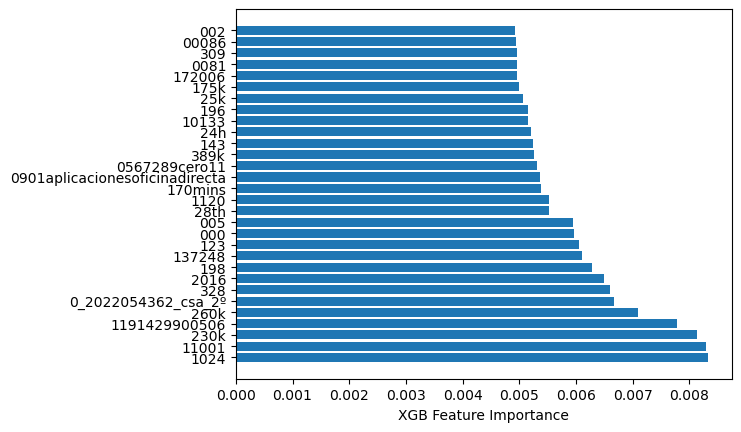

In [470]:
#Feature importance: projects before split 
features = X_train.columns
indices = np.argsort(importances)[::-1][:30]  # select top 30 features

plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('XGB Feature Importance')
plt.show()

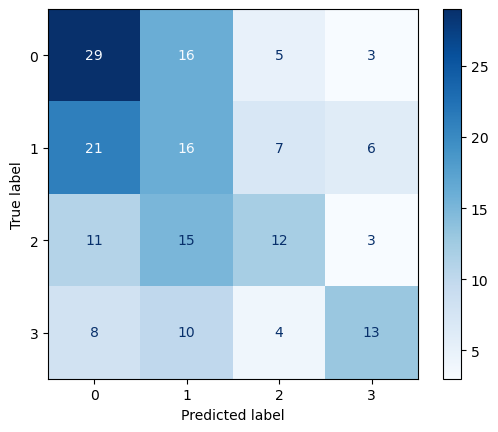

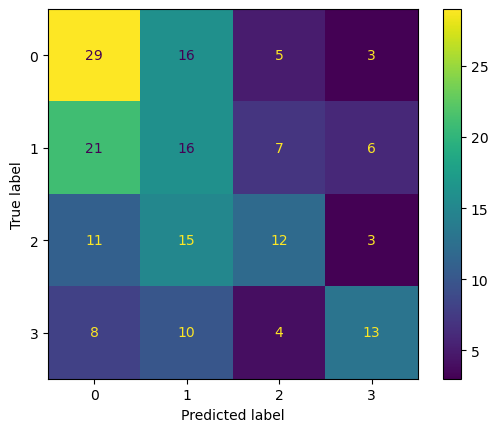

              precision    recall  f1-score   support

           0       0.37      0.81      0.51        53
           1       0.28      0.22      0.24        50
           2       0.62      0.20      0.30        41
           3       0.82      0.26      0.39        35

    accuracy                           0.40       179
   macro avg       0.52      0.37      0.36       179
weighted avg       0.49      0.40      0.36       179



In [496]:
#confusion matrix: projects before the split
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

y_pred_xgb=pipexgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred_xgb, labels=pipexgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipexgb.classes_)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
disp.plot()
plt.show()

from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_pred))

In [497]:
#Overfitting
pipexgb.score(X_train, y_train)

1.0

In [498]:
#projects after switch
pipexgb.score(X_after, y_after)

0.3225806451612903

In [478]:
y_pred_after= pipexgb.predict(X_after)

In [479]:
from sklearn.metrics import classification_report
 
print(classification_report(y_after, y_pred_after))

              precision    recall  f1-score   support

           0       0.33      0.66      0.44       103
           1       0.28      0.28      0.28       137
           2       0.33      0.19      0.24       125
           3       0.40      0.19      0.26       100

    accuracy                           0.32       465
   macro avg       0.34      0.33      0.31       465
weighted avg       0.33      0.32      0.30       465



In [489]:
#SVM CLASSIFIER
from sklearn.svm import SVC
import sklearn
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline 
from sklearn.decomposition import PCA

pca= PCA(n_components = 0.95)
steps = [('pca', pca),
         ('svm', SVC())]

pipesvm = Pipeline(steps)
pipesvm.fit(X_train, y_train)
pipesvm.score(X_test, y_test)

0.39664804469273746

In [481]:
#Overfitting
pipesvm.score(X_train, y_train)

0.9032258064516129

In [482]:
#projects after switch
pipesvm.score(X_after, y_after)

0.2731182795698925

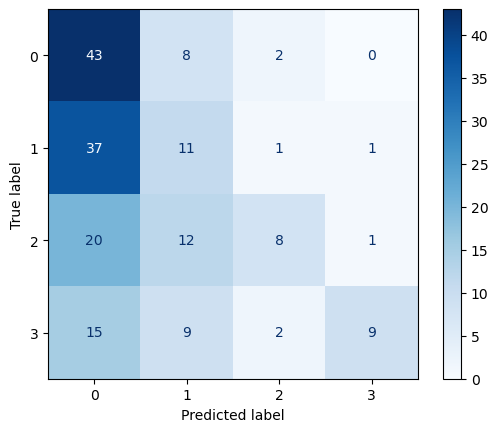

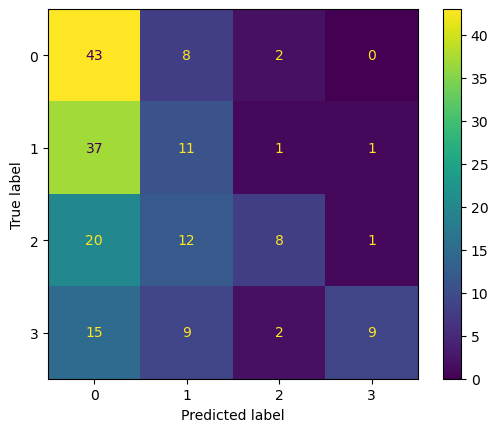

              precision    recall  f1-score   support

           0       0.37      0.81      0.51        53
           1       0.28      0.22      0.24        50
           2       0.62      0.20      0.30        41
           3       0.82      0.26      0.39        35

    accuracy                           0.40       179
   macro avg       0.52      0.37      0.36       179
weighted avg       0.49      0.40      0.36       179



In [484]:
#confusion matrix + classification report: projects before the split 
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

y_pred=pipesvm.predict(X_test)
y_pred_svm=pipesvm.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=pipesvm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipesvm.classes_)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
disp.plot()
plt.show()

from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_pred_svm))

In [499]:
#Performance on projects after the transition
from sklearn.inspection import permutation_importance

y_pred_svm_after=pipesvm.predict(X_after)
print(classification_report(y_after, y_pred_svm_after))

              precision    recall  f1-score   support

           0       0.27      0.86      0.41       103
           1       0.21      0.12      0.15       137
           2       0.33      0.10      0.16       125
           3       0.53      0.09      0.15       100

    accuracy                           0.27       465
   macro avg       0.34      0.29      0.22       465
weighted avg       0.32      0.27      0.21       465



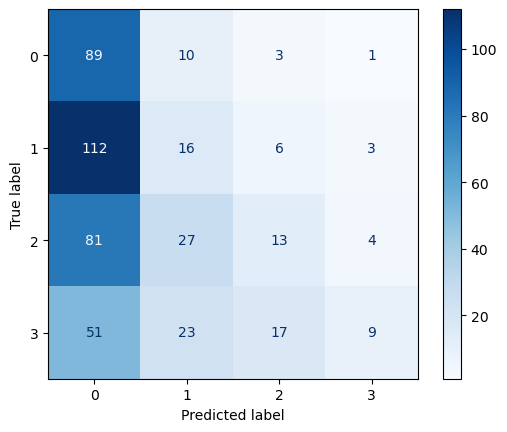

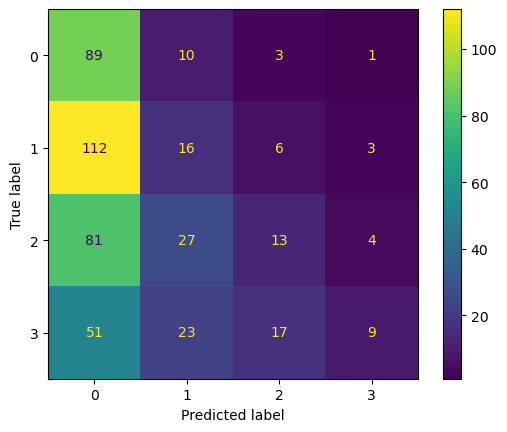

In [503]:
#confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

y_pred_svm_after=pipesvm.predict(X_after)
cm = confusion_matrix(y_after, y_pred_svm_after, labels=pipesvm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipesvm.classes_)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
disp.plot()
plt.show()

## Alcance = TRASH

In [ ]:
for idx, text in resumen_alcance['Alcance'].items():
        try:
                resumen_alcance.loc[idx, 'Alcance'] = translator.translate(text).text  
        except:
                pass

In [ ]:
resumen_alcance['Alcance']

In [ ]:
# Create an instance of RegexpTokenizer for alphanumeric tokens
import nltk
nltk.download('stopwords') 
nltk.download('wordnet')
# Import packages and modules
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
tokeniser = RegexpTokenizer(r'\w+')
lemmatiser = WordNetLemmatizer()
preprocessed_alc=[]

for resumen in resumen_alcance['Alcance']:
    try:
        tokens=tokeniser.tokenize(resumen)
        lemmas = [lemmatiser.lemmatize(word.lower(), pos='v') for word in tokens]
        key_words = [word for word in lemmas if word not in stopwords.words('english') and len(word) > 2]
        preprocessed_alc.append(key_words)
    except:
        preprocessed_alc.append(None)

In [ ]:
#Model: Bag of words 
from sklearn.preprocessing import MultiLabelBinarizer

count_vec = MultiLabelBinarizer()
mlb = count_vec.fit(preprocessed_alc)
result = pd.DataFrame(mlb.transform(preprocessed_alc), columns=[mlb.classes_])

In [ ]:
result

In [ ]:
result['horas']=resumen_alcance['Horas']
result['horas']


In [ ]:
result.isna().sum().sum()

In [ ]:
y=result['horas']
X=result.drop(columns=['horas'])

In [ ]:
from sklearn.model_selection import train_test_split

(X_train, X_test, y_train, y_test) = train_test_split(X, y, random_state = 42)


In [ ]:
! pip install seaborn

In [ ]:
! pip install matplotlib 

In [ ]:
result['horas'].quantile(0.95)

In [ ]:
b_plot = result.boxplot(column = 'horas') 
b_plot.plot()

In [ ]:
sns.catplot(y='horas', data=result, kind='box')

In [ ]:
hours_bins = []
for hour in result['horas']:
    if hour <= 300:
        hours_bins.append('0-300')
    elif hour > 300 and hour <= 800:
        hours_bins.append('301-800')
    elif hour > 800 and hour <= 2000:
        hours_bins.append('801-2000')
    elif hour > 2000:
        hours_bins.append('2000+')
    else:
        hours_bins.append(None)

